<a href="https://colab.research.google.com/github/ayushjain079/Visibility-Graphs/blob/main/Visibility_Graphs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install visibility_graph

In [ ]:
#!pip uninstall imgaug
!pip install imgaug==0.2.6

     |████████████████████████████████| 634kB 14.9MB/s 
  Created wheel for imgaug: filename=imgaug-0.2.6-cp37-none-any.whl size=654019 sha256=a46a84650cb81b8c06da2534b89f4166b15f6eaedc05bd19d8d0fd898218ac71
  Stored in directory: /root/.cache/pip/wheels/97/ec/48/0d25896c417b715af6236dbcef8f0bed136a1a5e52972fc6d0
Successfully built imgaug
  Found existing installation: imgaug 0.2.9
    Uninstalling imgaug-0.2.9:
      Successfully uninstalled imgaug-0.2.9


In [ ]:
#!pip uninstall networkx
!pip install networkx==2.3

     |████████████████████████████████| 1.8MB 13.9MB/s 
  Created wheel for networkx: filename=networkx-2.3-py2.py3-none-any.whl size=1556427 sha256=94989a55295cc3b2d96a549a62ed7bb1fd66299ab2ea0fc272e2e82dcd6fca49
  Stored in directory: /root/.cache/pip/wheels/de/63/64/3699be2a9d0ccdb37c7f16329acf3863fd76eda58c39c737af
Successfully built networkx
  Found existing installation: networkx 2.5.1
    Uninstalling networkx-2.5.1:
      Successfully uninstalled networkx-2.5.1


In [ ]:
from visibility_graph import visibility_graph
import pandas as pd
from pandas import read_csv
from matplotlib import pyplot as plt
import math
import numpy as np
import networkx as nx
from itertools import repeat

In [ ]:
#series = [0.87, 0.49, 0.36, 0.83, 0.87]
#series = [0.82, 0.50, 0.90, 0.80, 0.87, 0.93] # series made ny me
series = [7.0, 4.0, 8.0, 6.5, 7.6, 9.0] # Time series data as given in paper
g = visibility_graph(series)
g.nodes()
g.edges() # doubt
#g.node[1]

EdgeView([(0, 1), (0, 2), (1, 2), (2, 3), (2, 4), (2, 5), (3, 4), (3, 5), (4, 5)])

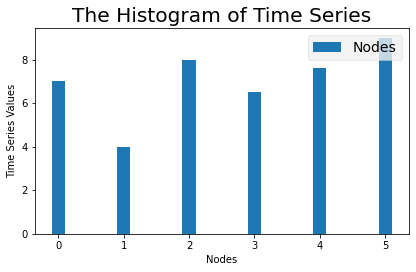

In [ ]:
plt.bar(g.nodes, series, width = 0.2, label = "Nodes")
plt.style.use('fivethirtyeight')
plt.xlabel("Nodes")
plt.ylabel("Time Series Values")
plt.legend(loc="upper right")
plt.title("The Histogram of Time Series")
plt.grid(False)
plt.tight_layout()
plt.show()

**Horizontal Visibility Graph**

In [ ]:
# Horizontal Visibility Graph
# Create an adjacent matrix A

x = np.array([7.0, 4.0, 8.0, 6.5, 7.6, 9.0])
t = np.arange(0, len(x), 1)

a = [[0 for i in t] for j in t]
for i in t:
  for j in t:
    k = abs(j - i)
    count = 0
    if (k == 0):
      a[i][j] = 0 # makes weight of connection between same node equal to zero
    elif (k == 1):
      a[i][j] = 1 # makes weight of connection between the adjecent nodes equal to 1
    else:
      if i>j:
        l = j
        n = i
      else:
        l = i
        n = j
      for m in range(l+1,n):
        if ((x[i]>x[m]) and (x[j]>x[m])): # checks if there is any obstracle between the two nodes
          a[i][j] = 1 # if not then the weight is adjusted to 1
        else:
          a[i][j] = 0 # if there is any obstracle then the weight is adjusted to 0
          count = count+1 # counts how many times obstracle is encountered
      if (count>0):
        a[i][j] = 0

A = np.array(a)
adj_mat = A
print(A)

[[0 1 1 0 0 0]
 [1 0 1 0 0 0]
 [1 1 0 1 1 1]
 [0 0 1 0 1 0]
 [0 0 1 1 0 1]
 [0 0 1 0 1 0]]


In [ ]:
# save numpy array as csv file
from numpy import asarray
from numpy import savetxt
new_column = ['1', '2', '3', '4', '5', '6']
A = np.insert(A, 0, new_column, axis=1)
new_row = ['0', '1', '2', '3', '4', '5', '6']
A = np.insert(A, 0, new_row, axis=0)
print(A)
data = A
data_list = data.tolist()
# save to csv file
print(data_list)
savetxt('data.csv', data, delimiter=',')

[[0 1 2 3 4 5 6]
 [1 0 1 1 0 0 0]
 [2 1 0 1 0 0 0]
 [3 1 1 0 1 1 1]
 [4 0 0 1 0 1 0]
 [5 0 0 1 1 0 1]
 [6 0 0 1 0 1 0]]
[[0, 1, 2, 3, 4, 5, 6], [1, 0, 1, 1, 0, 0, 0], [2, 1, 0, 1, 0, 0, 0], [3, 1, 1, 0, 1, 1, 1], [4, 0, 0, 1, 0, 1, 0], [5, 0, 0, 1, 1, 0, 1], [6, 0, 0, 1, 0, 1, 0]]


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


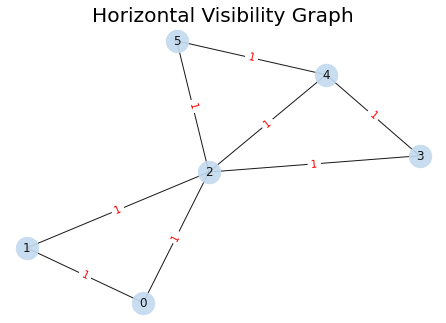

In [ ]:
def show_graph_with_labels(adjacency_matrix, nodes):
    rows, cols = np.where(adjacency_matrix == 1)
    values_list = []
    values_list.extend(repeat(1,len(rows)))
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.Graph()
    gr.add_edges_from(edges)
    
    dummy = zip(rows.tolist(), cols.tolist()) # to create dictionary for edge_labels
    zip_iterator = zip(dummy, values_list) # adds the value corresponding to the connected nodes
    edgelabels = dict(zip_iterator)
    #print(edgelabels)

    pos = nx.spring_layout(gr)


    nx.draw(gr, pos, edge_color='black', width=1, linewidths=1,\
            node_size=500, node_color='#c4daef', alpha=0.9,\
            labels={node:node for node in gr.nodes()})
    nx.draw_networkx_edge_labels(gr,pos,edge_labels=edgelabels,font_color='red')

    #nx.draw_networkx(gr, node_size=500, nodelist=nodes, node_color='#c4daef')
    plt.axis('off')
    plt.title("Horizontal Visibility Graph")
    plt.show()

nodes = [0, 1, 2, 3, 4, 5]

show_graph_with_labels(adj_mat, nodes)

**Directed Weighted Horizontal Visibility Graph**

Forward Weighted Horizontal Visibility Graph (FWHVG)

In [ ]:
# Forward Weighted Horizontal Visibility Graph
# Create an weight matrix A

x = np.array([7.0, 4.0, 8.0, 6.5, 7.6, 9.0])
t = np.arange(0, len(x), 1)

a = [[0 for i in t] for j in t]
for i in t:
  for j in t:
    k = abs(j - i)
    count = 0
    if (k == 0):
      a[i][j] = 0

    elif (j>i):   # for FWHVG the angle is checked in forward direction
      if (k == 1):
        a[i][j] = round((np.arctan((x[j]-x[i])/(j-i)) + np.arctan(x[i]/(j-i))),3) # rounds the decimal to 3 decimal places
      else:
        if i>j:
          l = j
          n = i
        else:
          l = i
          n = j
        for m in range(l+1,n):
          if ((x[i]>x[m]) and (x[j]>x[m])):
            a[i][j] = round((np.arctan((x[j]-x[i])/(j-i)) + np.arctan(x[i]/(j-i))),3)
          else:
            a[i][j] = 0
            count = count+1
        if (count>0):
          a[i][j] = 0

    elif (i>j):
      a[i][j] = 0

A = np.array(a)
Weight_Matrix_Forward = A
print(Weight_Matrix_Forward)

[[0.    0.18  1.756 0.    0.    0.   ]
 [0.    0.    2.652 0.    0.    0.   ]
 [0.    0.    0.    0.464 1.128 1.534]
 [0.    0.    0.    0.    2.251 0.   ]
 [0.    0.    0.    0.    0.    2.391]
 [0.    0.    0.    0.    0.    0.   ]]


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


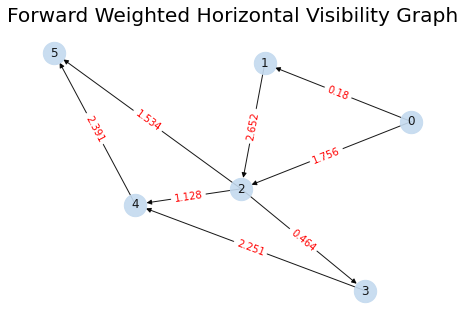

In [ ]:
def show_graph_with_labels(Weight_Matrix_Forward, nodes):
    rows, cols = np.where(Weight_Matrix_Forward != 0)
    values_list = []
    row = rows.tolist()
    col = cols.tolist()
    weight_mat = Weight_Matrix_Forward.tolist()
    for x in range(len(rows)):
      b = row[x]
      c = col[x]
      values_list.append(weight_mat[b][c]) # stores the weights corresponding to the nodes connected
    
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    
    dummy = zip(rows.tolist(), cols.tolist()) #to create dictionary for edge_labels
    zip_iterator = zip(dummy, values_list)
    edgelabels = dict(zip_iterator)
    #print(edgelabels)

    pos = nx.spring_layout(gr)
    #pos = {0: [0,0],
    #   1: [1,0],
    #   2: [2,0],
    #   3: [3,0],
    #   4: [4,0],
    #   5: [5,0]}

    nx.draw(gr, pos, edge_color='black', width=1, linewidths=1,\
            node_size=500, node_color='#c4daef', alpha=0.9,\
            labels={node:node for node in gr.nodes()})
    nx.draw_networkx_edge_labels(gr,pos,edge_labels=edgelabels,font_color='red')



    #nx.draw_networkx(gr, node_size=500, nodelist=nodes, node_color='#c4daef')
    plt.axis('off')
    plt.title("Forward Weighted Horizontal Visibility Graph")
    plt.show()

nodes = [0, 1, 2, 3, 4, 5]

show_graph_with_labels(Weight_Matrix_Forward, nodes)

Backward Weighted Horizontal Visibility Graph (FWHVG)

In [ ]:
# Backward Weighted Horizontal Visibility Graph
# Create an weight matrix A

x = np.array([7.0, 4.0, 8.0, 6.5, 7.6, 9.0])
t = np.arange(0, len(x), 1)

a = [[0 for i in t] for j in t]
for i in t:
  for j in t:
    k = abs(j - i)
    count = 0
    if (k == 0):
      a[i][j] = 0

    elif (i>j): # for BWHVG the angle is checked in backward direction
      if (k == 1):
        a[i][j] = abs(round((np.arctan((x[j]-x[i])/(j-i)) + np.arctan(x[i]/(j-i))),3))
      else:
        if i>j:
          l = j
          n = i
        else:
          l = i
          n = j
        for m in range(l+1,n):
          if ((x[i]>x[m]) and (x[j]>x[m])):
            a[i][j] = abs(round((np.arctan((x[j]-x[i])/(j-i)) + np.arctan(x[i]/(j-i))),3))
          else:
            a[i][j] = 0
            count = count+1
        if (count>0):
          a[i][j] = 0

    elif (j>i):
      a[i][j] = 0

A = np.array(a)
Weight_Matrix_Backward = A
print(Weight_Matrix_Backward)

[[0.    0.    0.    0.    0.    0.   ]
 [2.575 0.    0.    0.    0.    0.   ]
 [0.862 0.121 0.    0.    0.    0.   ]
 [0.    0.    2.401 0.    0.    0.   ]
 [0.    0.    1.511 0.607 0.    0.   ]
 [0.    0.    0.927 0.    0.51  0.   ]]


/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/dist-packages/networkx/drawing/nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes


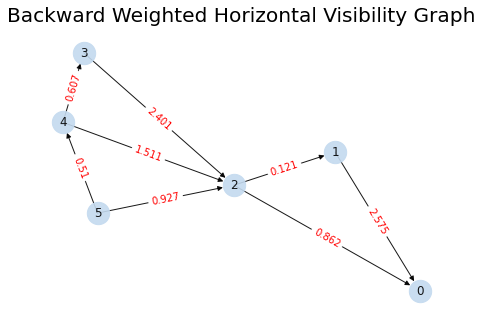

In [ ]:
def show_graph_with_labels(Weight_Matrix_Backward, nodes):
    rows, cols = np.where(Weight_Matrix_Backward != 0)
    values_list = []
    row = rows.tolist()
    col = cols.tolist()
    weight_mat = Weight_Matrix_Backward.tolist()
    for x in range(len(rows)):
      b = row[x]
      c = col[x]
      values_list.append(weight_mat[b][c])
    
    edges = zip(rows.tolist(), cols.tolist())
    gr = nx.DiGraph()
    gr.add_edges_from(edges)
    
    dummy = zip(rows.tolist(), cols.tolist()) #to create dictionary for edge_labels
    zip_iterator = zip(dummy, values_list)
    edgelabels = dict(zip_iterator)
    #print(edgelabels)

    pos = nx.spring_layout(gr)
    #pos = {0: [0,0],
    #   1: [1,0],
    #   2: [2,0],
    #   3: [3,0],
    #   4: [4,0],
    #   5: [5,0]}

    nx.draw(gr, pos, edge_color='black', width=1, linewidths=1,\
            node_size=500, node_color='#c4daef', alpha=0.9,\
            labels={node:node for node in gr.nodes()})
    nx.draw_networkx_edge_labels(gr,pos,edge_labels=edgelabels,font_color='red')



    #nx.draw_networkx(gr, node_size=500, nodelist=nodes, node_color='#c4daef')
    plt.axis('off')
    plt.title("Backward Weighted Horizontal Visibility Graph")
    plt.show()

nodes = [0, 1, 2, 3, 4, 5]

show_graph_with_labels(Weight_Matrix_Backward , nodes)